In [1]:



import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


df = pd.read_csv('./london_weather.csv')
# df.info()
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
# df.info()

#print(df.tail())
df=df[["date","mean_temp"]]
df=df[-5000:]
#print(df.tail())
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d', )
print(df.tail())

df.sort_values(by='date', inplace = True)
df.reset_index(drop=True, inplace=True)
#print(df.head())

df.columns = ['ds','y']
#print(df.tail())
df.set_index('ds', inplace= True)
#print(df.head())

#df.plot(x='df.index',y='y',figsize=(18,6))

print(len(df))






            date  mean_temp
13838 2019-12-27        7.5
13839 2019-12-28        8.1
13840 2019-12-29        8.7
13841 2019-12-30        6.5
13842 2019-12-31        7.1
5000


In [11]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['y'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 10, m = 7,
                          start_P = 0, seasonal = False,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20678.450, Time=2.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21052.675, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21047.166, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21042.983, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21050.681, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20611.485, Time=1.99 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20897.021, Time=0.86 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20611.081, Time=3.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20829.934, Time=1.18 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=20612.986, Time=4.76 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20613.025, Time=7.59 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20611.065, Time=4.89 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20609.065, Time=2.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=20810.833, Time=1.02 sec
 ARIMA(1,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -10299.544
Date:                Sun, 19 Mar 2023   AIC                          20607.089
Time:                        20:07:31   BIC                          20633.157
Sample:                             0   HQIC                         20616.225
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5859      0.027     21.995      0.000       0.534       0.638
ma.L1         -0.7022      0.029    -24.429      0.000      -0.759      -0.646
ma.L2         -0.1620      0.019     -8.626      0.000      -0.199      -0.125
sigma2         3.6063      0.068     53.316      0.000       3.474       3.739
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                59.99
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.22
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
#Fit ARIMA Model to AirPassengers dataset
from statsmodels.tsa.arima.model import ARIMA


In [8]:
# Split data into train / test sets
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['y'], 
                order = (1, 1, 2), 
                seasonal_order =(1, 0, 0, 7)
             )
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 4635
Model:             SARIMAX(1, 1, 2)x(1, 0, [], 7)   Log Likelihood               -9560.064
Date:                            Sun, 19 Mar 2023   AIC                          19130.129
Time:                                    20:04:05   BIC                          19162.335
Sample:                                         0   HQIC                         19141.460
                                           - 4635                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5953      0.028     21.502      0.000       0.541       0.650
ma.L1         -0.7107      0.030    -23.577      0.000      -0.770      -0.652
ma.L2         -0.1601      0.020     -8.128      0.000      -0.199      -0.122
ar.S.L7        0.0228      0.015      1.478      0.139      -0.007       0.053
sigma2         3.6258      0.071     51.167      0.000       3.487       3.765
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.21
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.21
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='ds'>

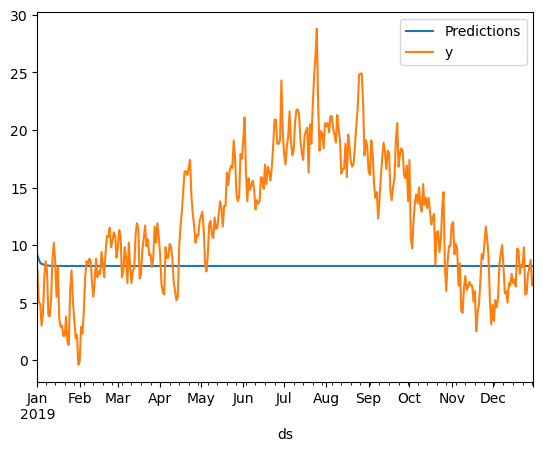

In [9]:
#Predictions of ARIMA Model against the test set
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

predictions.index=df.index[start:end+1]

# plot predictions and actual values
predictions.plot(legend = True)
test['y'].plot(legend = True)

In [57]:
predictions

ds
2019-01-01    8.305956
2019-01-02    8.312731
2019-01-03    7.232473
2019-01-04    7.186443
2019-01-05    8.758972
                ...   
2019-12-27    7.668188
2019-12-28    9.440201
2019-12-29    8.769065
2019-12-30    8.305849
2019-12-31    7.271157
Name: Predictions, Length: 365, dtype: float64

In [58]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
RMSE=rmse(test["y"], predictions)
  
# Calculate mean squared error
ERROR=mean_squared_error(test["y"], predictions)

In [59]:
ERROR

48.54412477636476

In [60]:
RMSE

6.967361392691265

<Axes: xlabel='ds'>

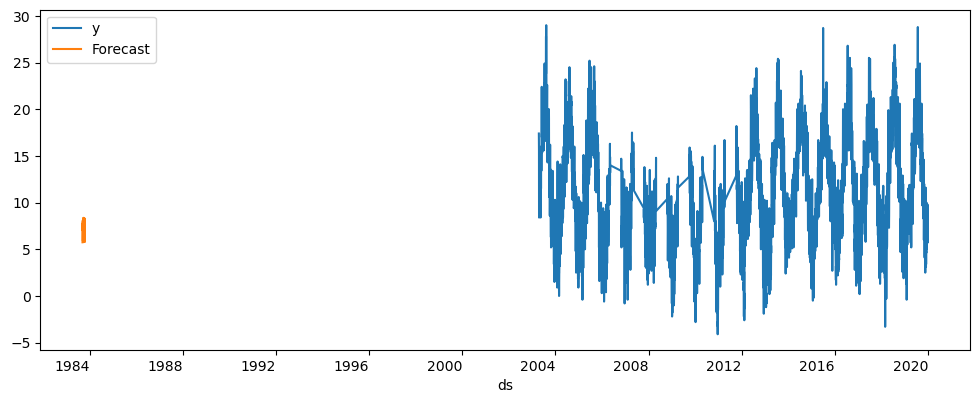

In [61]:
#Forecast using ARIMA Model


# Train the model on the full dataset
model = model = ARIMA(df['y'], 
                        order = (3, 0, 0), 
                        seasonal_order =(2, 1, 0, 7))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['y'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [62]:
forecast

5000    5.750514
5001    6.521580
5002    7.706849
5003    7.247616
5004    8.075177
5005    6.983853
5006    7.843069
5007    5.905395
5008    7.320053
5009    8.245671
5010    7.575225
5011    8.327961
5012    7.193351
5013    8.254561
5014    5.782374
5015    6.562473
5016    7.827080
5017    7.645216
5018    8.371065
5019    6.896293
5020    7.742101
5021    5.808842
5022    6.782602
5023    7.916094
5024    7.490946
5025    8.259031
5026    7.017083
5027    7.934086
5028    5.832587
5029    6.892980
5030    7.997994
5031    7.566643
5032    8.316568
5033    7.038241
5034    7.981146
5035    5.808524
Name: Forecast, dtype: float64

In [63]:
df['y']

ds
2003-04-16    17.4
2003-04-17    16.6
2003-04-18    15.6
2003-04-19     8.4
2003-04-20    10.8
              ... 
2019-12-27     7.5
2019-12-28     8.1
2019-12-29     8.7
2019-12-30     6.5
2019-12-31     7.1
Name: y, Length: 5000, dtype: float64